In [ ]:
#Import
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
#dataset:https://www.kaggle.com/akram24/restaurant-reviews
dataset = pd.read_csv('/content/Restaurant_Reviews.tsv',delimiter='\t',
                      quoting=3)

In [ ]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


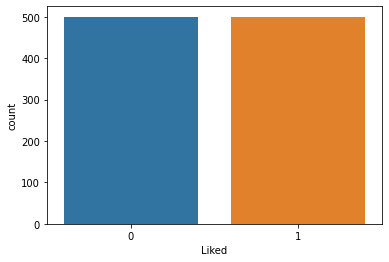

In [ ]:
sns.countplot(dataset['Liked'])

In [ ]:
dataset['Length']=dataset['Review'].apply(len)

In [ ]:
dataset

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


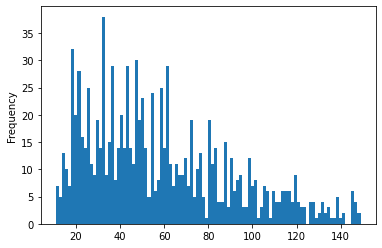

In [ ]:
#histogram
dataset['Length'].plot(bins=100,kind='hist')

In [ ]:
dataset.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [ ]:
#Cleaning Text
import re, nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = []
nsamples = len(dataset)

for i in range(nsamples):
  review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)


In [ ]:
##Create Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(max_features=1500)
corpus[0]

'wow love place'

In [ ]:
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1]

In [ ]:
features= cv.get_feature_names_out()
print(len(features),'\n',features[0:20])

1500 
 ['absolut' 'absolutley' 'accid' 'accommod' 'accomod' 'accordingli'
 'account' 'ach' 'acknowledg' 'across' 'actual' 'ad' 'afford' 'afternoon'
 'ago' 'ahead' 'airlin' 'airport' 'ala' 'albondiga']


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.naive_bayes import GaussianNB
class_nb = GaussianNB()
class_nb.fit(x_train,y_train)
y_pred = class_nb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test,y_pred)
cm  = confusion_matrix(y_test, y_pred)
print (acc,'\n',cm)

0.73 
 [[55 42]
 [12 91]]


In [ ]:
from xgboost import XGBClassifier
class_xgb = XGBClassifier()
class_xgb.fit(x_train,y_train)
y_pred = class_xgb.predict(x_test)
acc = accuracy_score(y_test,y_pred)
cm  = confusion_matrix(y_test, y_pred)
print (acc,'\n',cm)

0.705 
 [[91  6]
 [53 50]]


In [ ]:
##Use Neural Net Classifier Sentiment Analysis
